In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

import krakenex

import datetime
import calendar
import time
import requests

k = krakenex.API()
#k.load_key('keykra.key')
euro_pair = ['XXBTZEUR','XLTCZEUR','XETHZEUR','XETCZEUR','XZECZEUR'] #'BCHEUR',
xbt_pair = ['XETCXXBT','BCHXBT']

#pair = 'BCHEUR' 
interval = 60*24
since = "2017-08-01 00:00:00"#"2017-6-1"#


In [58]:
def getpair(pair):
    query = k.query_public('OHLC',req = {'pair':pair,'interval':interval,'since':since})
    dfres = pd.DataFrame(query['result'][pair],columns=['time','open','high','low','close','vwap','vol','count'])
    dfres['timeread'] = pd.to_datetime(dfres['time'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(x)) ))
    dfres.index = dfres['timeread']
    dfres = dfres['close'].astype('float')
    dfres.rename(pair,inplace=True)
    #for col in ['open','close','high','low','vol','count','vwap']:
    #dfres['close'] = dfres['close'].astype('float')
    return dfres[since:]


In [59]:
dfeuro = pd.DataFrame([getpair(pair) for pair in euro_pair]).T
dfeuro.head()

,XXBTZEUR,XLTCZEUR,XETHZEUR,XETCZEUR,XZECZEUR
timeread,,,,,
2017-08-01,2328.7,36.98,193.01,12.379,162.000
2017-08-02,2277.7,35.06,183.99,12.275,163.185
2017-08-03,2375.9,36.37,191.90,12.919,160.485
2017-08-04,2428.3,36.56,187.25,12.561,157.483
2017-08-05,2762.4,39.14,214.02,13.236,173.596


DateParseError: month must be in 1..12

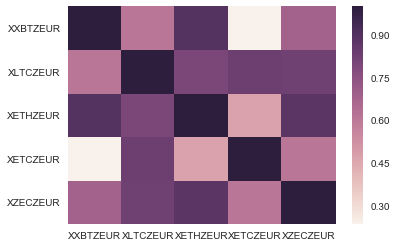

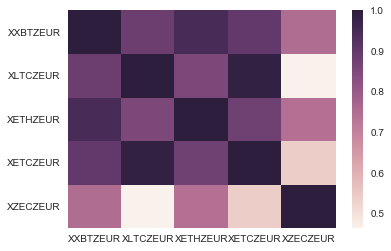

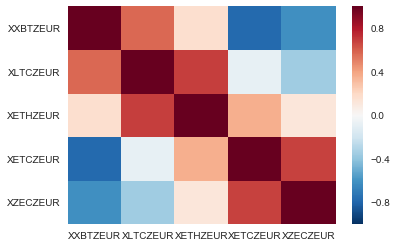

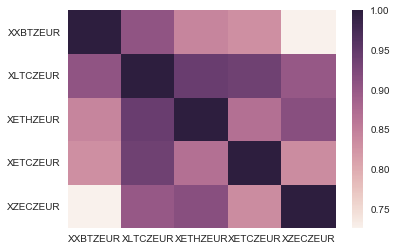

In [91]:
for mon in range(5):
    monbig = '2017-'+str(8+mon)+'-01'
    monend = '2017-'+str(9+mon)+'-01'
    plt.figure()
    sns.heatmap(dfeuro[monbig:monend].corr())

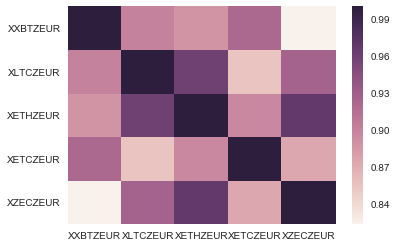

In [105]:
monbig = '2017-10-01'
monend = '2018-01-01'
sns.heatmap(dfeuro[monbig:monend].corr())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F911D30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001FDFA588>], dtype=object)

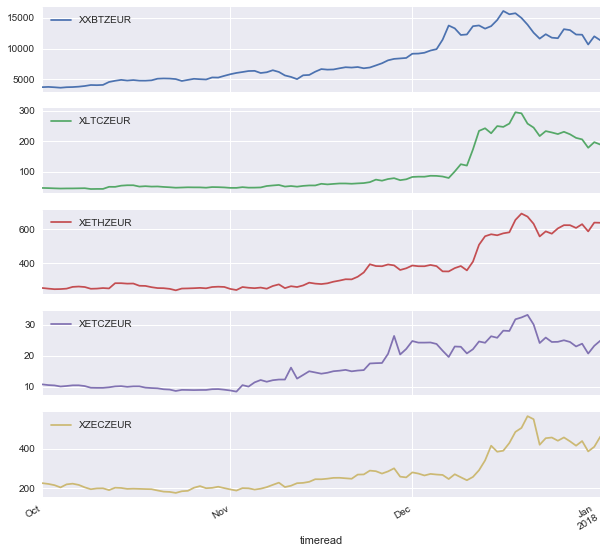

In [106]:
dfeuro[monbig:monend].plot(subplots=True,figsize=(10,10))

In [29]:
from itertools import combinations
ratiodf = pd.DataFrame()
for (a,b) in (combinations(euro_pair,2)):
    pairname = a[:-3]+' / '+b[:-3]
    ratiodf[pairname] = dfeuro[a]/dfeuro[b]

In [32]:
dfeuro.columns.values

array(['XXBTZEUR', 'XLTCZEUR', 'XETHZEUR', 'XETCZEUR', 'XZECZEUR'], dtype=object)

In [60]:
ratiodf.quantile(q=0.8)

ETC /XXBTZ    0.003505
ETC /XLTCZ    0.281918
ETC /XETHZ    0.052209
ETC /XZECZ    0.071917
Name: 0.8, dtype: float64

In [73]:
np.array(dfeuro.quantile(q=0.8).drop('XETCZEUR'))*np.array(ratiodf.quantile(q=0.8))

array([ 40.60159692,  49.99417361,  25.53385584,  21.48422849])

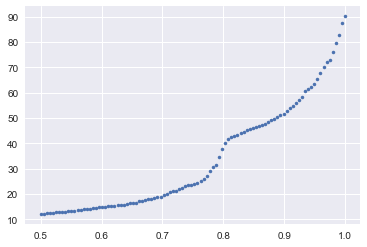

In [109]:
tmps = []
rangels = np.linspace(0.5, 1, num=100)
for i in list(rangels):
    arr = np.array(dfeuro.quantile(q=i).drop('XETCZEUR'))*np.array(ratiodf.quantile(q=i))
    tmp = arr[:3].mean()
    tmps.append(tmp)
plt.plot(rangels,tmps,'.')

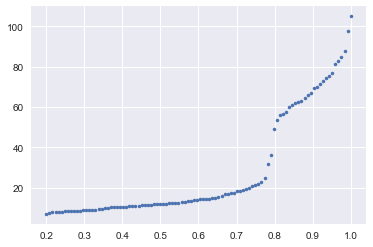

In [112]:
tmps = []
rangels = np.linspace(0.2, 1, num=100)
for i in list(rangels):
    arr = np.array(dfeuro.quantile(q=i).drop('XETCZEUR'))*np.array(ratiodf.quantile(q=i))
    tmp = arr[1]
    tmps.append(tmp)
plt.plot(rangels,tmps,'.')

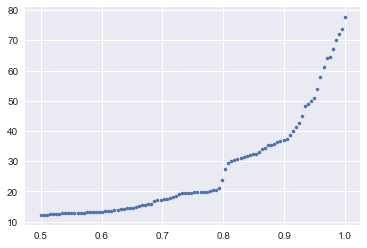

In [111]:
tmps = []
rangels = np.linspace(0.5, 1, num=100)
for i in list(rangels):
    arr = np.array(dfeuro.quantile(q=i).drop('XETCZEUR'))*np.array(ratiodf.quantile(q=i))
    tmp = arr[2]
    tmps.append(tmp)
plt.plot(rangels,tmps,'.')

In [79]:
np.array(dfeuro.quantile(q=1).drop('XETCZEUR'))*np.array(ratiodf.quantile(q=1))

array([  87.73762212,  104.96465494,   77.64932104,   56.55802334])

In [80]:
np.array([87.73762212,  104.96465494,   77.64932104]).mean()

90.117199366666668

In [78]:
np.array([75.19178654,  86.46837536,  67.4071205]).mean()

76.355760799999999

In [76]:
np.array([62.51366419,  76.32801345,  51.18370007]).mean()

63.341792569999996

In [70]:
ratiodf.quantile(q=0.8)

ETC /XXBTZ    0.003505
ETC /XLTCZ    0.281918
ETC /XETHZ    0.052209
ETC /XZECZ    0.071917
Name: 0.8, dtype: float64

In [61]:
ratiodf.max()

ETC /XXBTZ    0.005438
ETC /XLTCZ    0.355210
ETC /XETHZ    0.068035
ETC /XZECZ    0.091705
dtype: float64

In [63]:
dfeuro.max()

XXBTZEUR    16135.600
XLTCZEUR      295.500
XETHZEUR     1141.310
XETCZEUR       34.566
XZECZEUR      616.741
dtype: float64

In [64]:
dfeuro.quantile(q=0.8)

XXBTZEUR    11582.7200
XLTCZEUR      177.3360
XETHZEUR      489.0720
XETCZEUR       24.1720
XZECZEUR      298.7346
Name: 0.8, dtype: float64

In [33]:
ratiodf = pd.DataFrame()
for col in ['XXBTZEUR', 'XLTCZEUR', 'XETHZEUR', 'XZECZEUR']:
    pairname= 'ETC /'+col[:-3]
    ratiodf[pairname] = dfeuro[ 'XETCZEUR']/dfeuro[col]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001514BF28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000016154F98>], dtype=object)

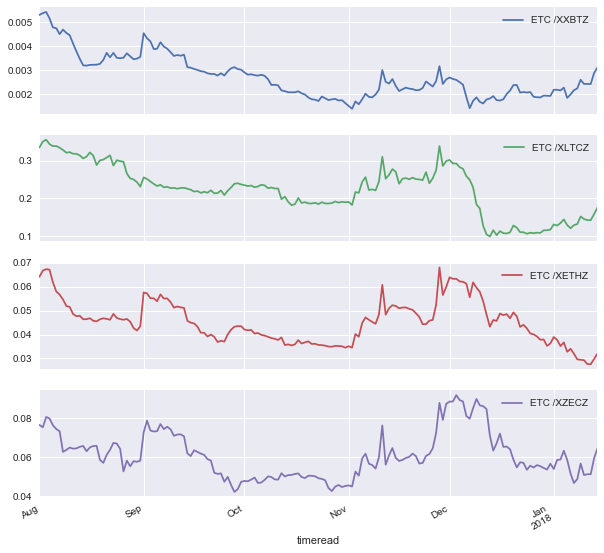

In [43]:
ratiodf.plot(subplots=True,figsize=(10,10))

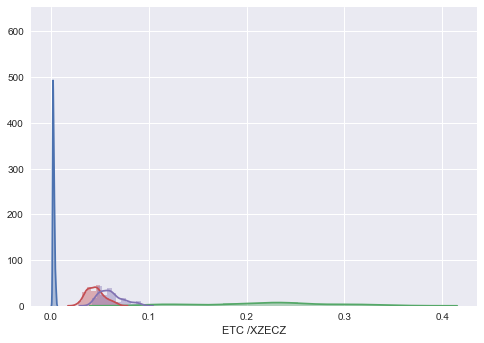

In [41]:
import seaborn as sns
plt.figure()
for i in range(4):
    sns.distplot(ratiodf.iloc[:,i])

In [42]:
qrange=[0,0.8]
ratiodf.qcut(qrange)

AttributeError: 'DataFrame' object has no attribute 'qcut'

In [10]:
[getpair(pair).index.min() for pair in euro_pair]

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00')]